# Used Cars Price Prediction

### Import Packages

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor

### Import Feature-Engineered Dataset

In [ ]:
df = pd.read_csv("feature_engineered_dataset.csv")
df.head()

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,id,price,no_of_owners,...,fuel_type_petrol,fuel_type_petrolelectric,transmission_manual,vehicle_type_luxury sedan,vehicle_type_midsized sedan,vehicle_type_mpv,vehicle_type_others,vehicle_type_sports car,vehicle_type_stationwagon,vehicle_type_suv
0,4.128331,4.299768,2.545764,-2.822400,0.391710,-1.837466,0.115392,1353648,118800,4,...,True,False,False,False,False,False,False,True,False,False
1,5.294561,2.511898,4.016187,0.654602,-0.841858,-1.274461,-1.101813,1371140,238800,6,...,True,False,False,False,False,False,False,True,False,False
2,3.962622,2.883626,2.225373,-2.328902,-0.536783,-2.316213,-0.514094,1386320,133888,5,...,True,False,False,False,False,False,False,True,False,False
3,1.362260,1.072161,-0.456550,-0.861446,0.749817,0.167105,-0.094244,1377681,136800,2,...,True,False,False,False,False,False,False,True,False,False
4,2.938016,1.247148,-0.670115,-0.727379,0.506640,-0.783463,-0.715036,1220824,181800,6,...,True,False,False,False,False,False,False,True,False,False


### Prepare Dataset for Model Training

In [ ]:
# Separate features and target
X = df.drop(columns=["price"])
y = df["price"]

# Split off 10% as holdout test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=42
)

# Replace spaces in column names
X_train.columns = X_train.columns.str.replace(" ", "_")
X_test.columns = X_test.columns.str.replace(" ", "_")

# K-fold cross validation config
kf = KFold(n_splits=5, shuffle=True, random_state=42)

### Evaluation Function

In [ ]:
def evaluate_model(model_name, model):
    print(f"\n🔍 Evaluating: {model_name}")

    metrics = {}
    mae_list, mse_list, rmse_list, r2_list = [], [], [], []

    for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
        X_fold_train, X_val = X_train.iloc[train_idx], X_train.iloc[val_idx]
        y_fold_train, y_val = y_train.iloc[train_idx], y_train.iloc[val_idx]

        model.fit(X_fold_train, y_fold_train)
        y_pred = model.predict(X_val)

        # Calculate metrics
        mae = mean_absolute_error(y_val, y_pred)
        mse = mean_squared_error(y_val, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_val, y_pred)

        mae_list.append(mae)
        mse_list.append(mse)
        rmse_list.append(rmse)
        r2_list.append(r2)

    metrics = {
        "Mean MAE": np.mean(mae_list),
        "MAE Std": np.std(mae_list),
        "Mean MSE": np.mean(mse_list),
        "Mean RMSE": np.mean(rmse_list),
        "Mean R²": np.mean(r2_list)
    }

    print(f"\n📊 Cross-Validation Metrics for {model_name}:")
    for key, value in metrics.items():
        print(f"{key:<12}: {value:.2f}")

### Baseline Modelling

In [ ]:
# Selected Baseline Models
baseline_models = {
    "Decision Tree": DecisionTreeRegressor(random_state=42),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),
}

# Evaluate Baseline Models
for model_name, model in baseline_models.items():
    evaluate_model(model_name, model)


🔍 Evaluating: Decision Tree

📊 Cross-Validation Metrics for Decision Tree:
Mean MAE    : 22739.70
MAE Std     : 567.78
Mean MSE    : 5415236495.86
Mean RMSE   : 71861.44
Mean R²     : 0.88

🔍 Evaluating: Random Forest

📊 Cross-Validation Metrics for Random Forest:
Mean MAE    : 15771.18
MAE Std     : 781.65
Mean MSE    : 2558732293.08
Mean RMSE   : 48229.83
Mean R²     : 0.95

🔍 Evaluating: Gradient Boosting

📊 Cross-Validation Metrics for Gradient Boosting:
Mean MAE    : 18106.06
MAE Std     : 617.95
Mean MSE    : 2362117922.08
Mean RMSE   : 46907.08
Mean R²     : 0.95


### Advanced Modelling

In [ ]:
# Advanced Models
advanced_models = {
    "XGBoost": XGBRegressor(n_estimators=100, n_jobs=-1, random_state=42),
    "LightGBM": LGBMRegressor(n_estimators=100, n_jobs=-1, random_state=42),
}

# Evaluate Advanced Models
for model_name, model in advanced_models.items():
    evaluate_model(model_name, model)


🔍 Evaluating: XGBoost

📊 Cross-Validation Metrics for XGBoost:
Mean MAE    : 15239.06
MAE Std     : 806.11
Mean MSE    : 3049733427.20
Mean RMSE   : 52311.00
Mean R²     : 0.94

🔍 Evaluating: LightGBM
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.040749 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100072
[LightGBM] [Info] Number of data points in the train set: 6482, number of used features: 449
[LightGBM] [Info] Start training from score 143119.423635
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.039990 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 100075
[LightGBM] [Info] Number of data points in the train set: 6482, number of used features: 449
[LightGBM] [Info] Start training from score 142811.102592
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.048560 secon

### Hyperparameter Tuning
Based on our baseline modelling and advanced modelling, RandomForest, XGBoost and LightGBM were the top performers based on Mean MAE, Mean MSE and Mean R^2.

Thus, in the following section, we will be tuning the hyperparameter for our RandomForest, XGBoost and LightGBM model to improve their performance.


In [ ]:
# Random Forest parameter grid
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'max_features': ['sqrt', 'log2'],
    'min_samples_split': [2, 5],
}

# XGBoost paramter grid
xgb_params = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 5, 7, 10],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'reg_alpha': [0, 0.1, 1],
    'reg_lambda': [1, 1.5, 2]
}

# LightGBM parameter grid
lgbm_params = {
    'n_estimators': [100, 200],
    'learning_rate': [0.05, 0.1],
    'num_leaves': [31, 50, 100],
    'max_depth': [-1, 5, 10],
    'min_child_samples': [5, 20, 50],
    'feature_fraction': [0.8, 0.9, 1.0],
    'force_col_wise': [True],
}

In [ ]:
# Random Forest
rf_random = RandomizedSearchCV(
    RandomForestRegressor(random_state=42),
    param_distributions=rf_params,
    n_iter=24,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

rf_random.fit(X_train, y_train)
print("Random Forest Best MAE:", -rf_random.best_score_)
print("Best Params:", rf_random.best_params_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Random Forest Best MAE: 27867.638711370946
Best Params: {'n_estimators': 200, 'min_samples_split': 2, 'max_features': 'sqrt', 'max_depth': None}


In [ ]:
# XGBoost
xgb = XGBRegressor(
    objective='reg:squarederror',
    random_state=42,
    n_jobs=-1
)

xgb_random = RandomizedSearchCV(
    estimator=xgb,
    param_distributions=xgb_params,
    n_iter=30,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=1,
    n_jobs=-1,
    random_state=42
)

xgb_random.fit(X_train, y_train)
print("XGBoost Best MAE:", -xgb_random.best_score_)
print("Best Params:", xgb_random.best_params_)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
XGBoost Best MAE: 13954.3681640625
Best Params: {'subsample': 0.6, 'reg_lambda': 2, 'reg_alpha': 1, 'n_estimators': 300, 'max_depth': 7, 'learning_rate': 0.1, 'colsample_bytree': 0.8}


In [ ]:
# LightGBM
lgbm_random = RandomizedSearchCV(
    LGBMRegressor(random_state=42),
    lgbm_params,
    n_iter=30,
    scoring='neg_mean_absolute_error',
    cv=5,
    n_jobs=-1,
    verbose=1,
    random_state=42
)

lgbm_random.fit(X_train, y_train)
print("LightGBM Best MAE:", -lgbm_random.best_score_)
print("Best Params:", lgbm_random.best_params_)


Fitting 5 folds for each of 30 candidates, totalling 150 fits
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Warning] feature_fraction is set=0.8, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.8
[LightGBM] [Info] Total Bins 100086
[LightGBM] [Info] Number of data points in the train set: 8103, number of used features: 455
[LightGBM] [Info] Start training from score 143045.399111
LightGBM Best MAE: 14322.580870803466
Best Params: {'num_leaves': 31, 'n_estimators': 200, 'min_child_samples': 5, 'max_depth': 10, 'learning_rate': 0.1, 'force_col_wise': True, 'feature_fraction': 0.8}


### Final Model Evaluation

Since the tuned XGBoost model achieved the best results, we will use it as the deployed model for our prediction app. Below, we retrain it with the best hyperparameters and evaluate its performance.

In [ ]:
tuned_xgb = XGBRegressor(
    objective='reg:squarederror',
    subsample=0.6,
    reg_lambda=2,
    reg_alpha=1,
    n_estimators=300,
    max_depth=7,
    learning_rate=0.1,
    colsample_bytree=0.8,
    random_state=42,
    n_jobs=-1
)

tuned_xgb.fit(X_train, y_train)
y_pred = tuned_xgb.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print("📊 Final Evaluation on Test Set:")
print(f"MAE  : {mae:.2f}")
print(f"MSE  : {mse:.2f}")
print(f"RMSE : {rmse:.2f}")
print(f"R²   : {r2:.4f}")

📊 Final Evaluation on Test Set:
MAE  : 11199.87
MSE  : 862499264.00
RMSE : 29368.34
R²   : 0.9789


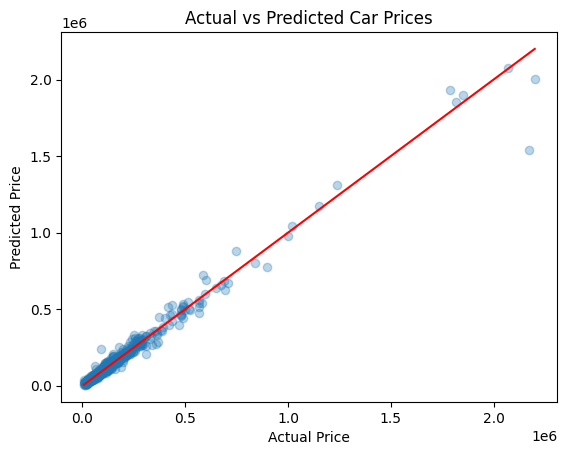

In [ ]:
# Scatter plot to visualise model perfomance
plt.scatter(y_test, y_pred, alpha=0.3)
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red')
plt.show()